In [1]:
import matplotlib
from pylab import *
import matplotlib.pyplot as plt

In [72]:
def initialize():
    global config
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else -1
            
def observe(title = None):
    global config
    plt.figure(figsize=(10,10))
    subplots_adjust(bottom=0.3,top=0.70, wspace = 0.6)
    ax1 = plt.subplot(1,1,1)
    ax1.imshow(config, vmin = 0, vmax = 1, cmap = cm.plasma)
    ax1.set_title(title)
#     ax2 = plt.subplot(1,2,2)
#     ax2.plot(list(range(len(current_density))),current_density)


def update():
    global config
    x,y = np.random.choice(list(range(n)),2)
    E = 0
    for dx,dy in [(0,1),(0,-1),(1,0),(-1,0)]:
        E += config[(x + dx) % n, (y + dy) % n]*config[x,y]
    E = -E
    prob_flip = min(1, np.e**(2*E/T)) 
    if np.random.random() < prob_flip:
        config[x, y] *= -1

-526.0
-748.0
-4.0
204.0
-120.0


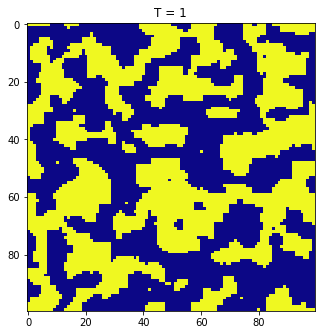

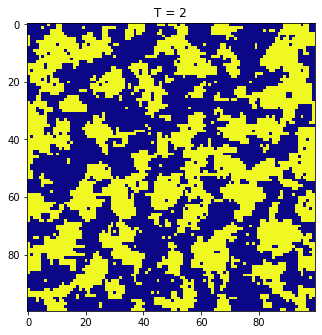

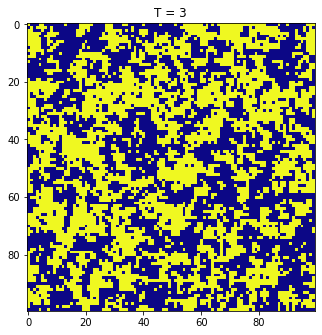

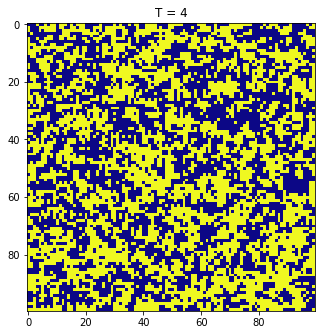

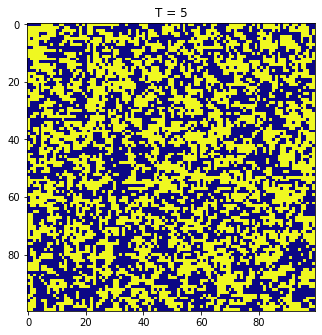

In [87]:
#Simulating for various values of T

n = 100 # size of grid: n x n
p = 0.5 # probability of initially positive atoms

for T in [1,2,3,4,5]:
    initialize()
    for i in range(100000):
        update()
    observe('T = {}'.format(T))
    print(sum(config))

100.0
100.0
24.0
-14.0
8.0


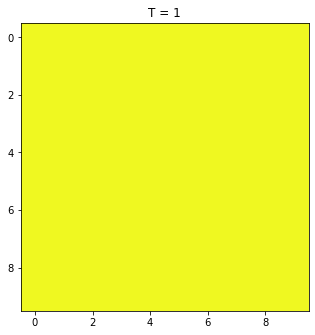

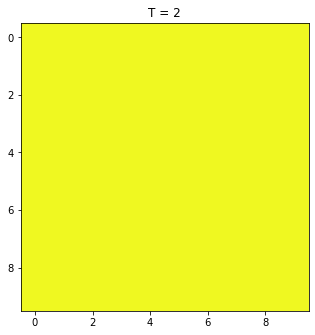

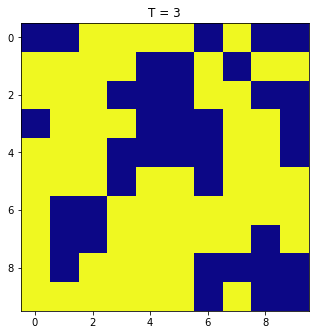

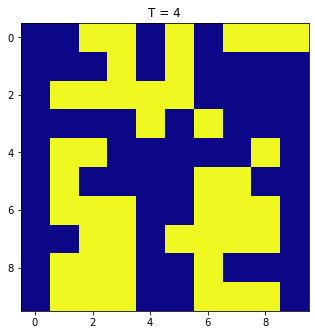

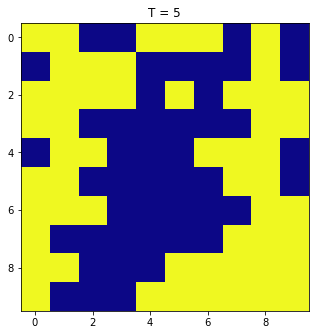

In [86]:
#Simulating for various values of T

n = 10 # size of grid: n x n
p = 0.5 # probability of initially positive atoms

for T in [1,2,3,4,5]:
    initialize()
    for i in range(100000):
        update()
    observe('T = {}'.format(T))
    print(sum(config))

From these results (comparing with the visualizations of the pcw pdf) we can see that we don't really match the completely uniform distribution for small values of T (T=0.01,1). We do however get very similar results for large values of T (T=4,5). For T=2, we also get very similar results.

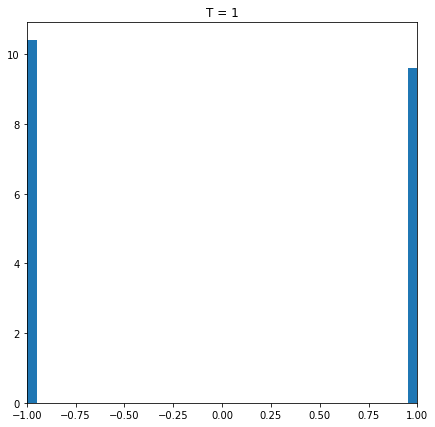

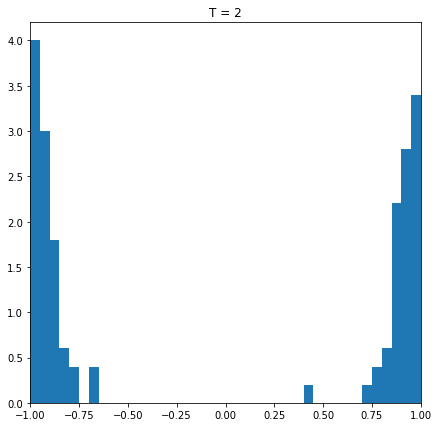

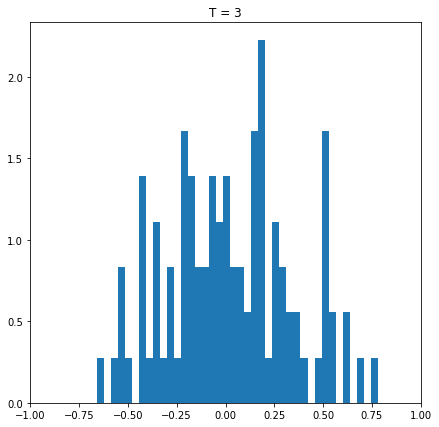

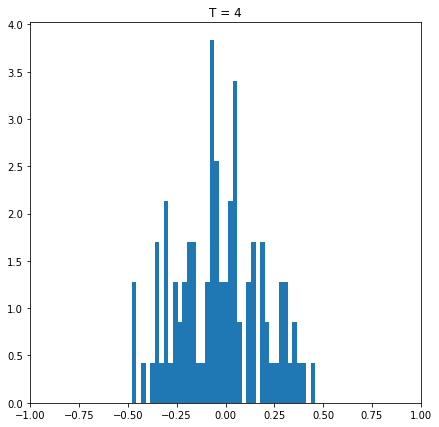

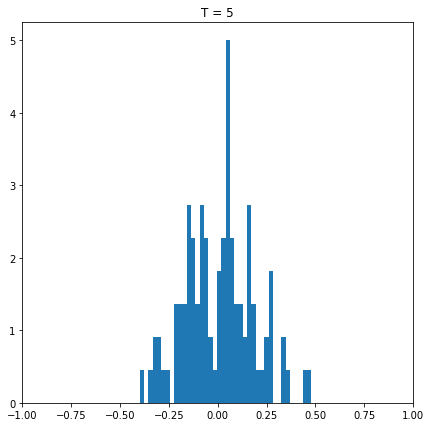

In [88]:
n=10

def magnetization(steps=100000,trials =100):
    M = np.zeros(100)
    for i in range(trials):
        initialize()
        for j in range(steps):
            update()
        M[i] = np.mean(config)
    return M

for T in range(1,6):
    M = magnetization()
    plt.figure(figsize=(7,7))
    plt.hist(M, density = 1, bins = 40)
    plt.xlim([-1,1])
    plt.title('T = {}'.format(T))
    plt.show()


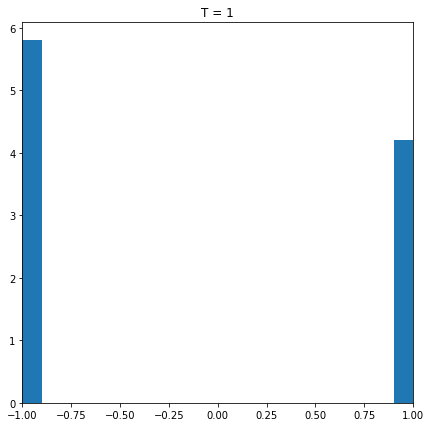

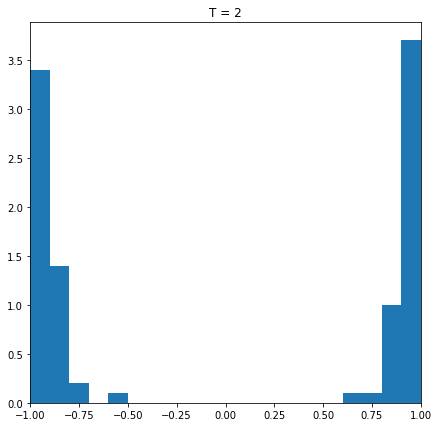

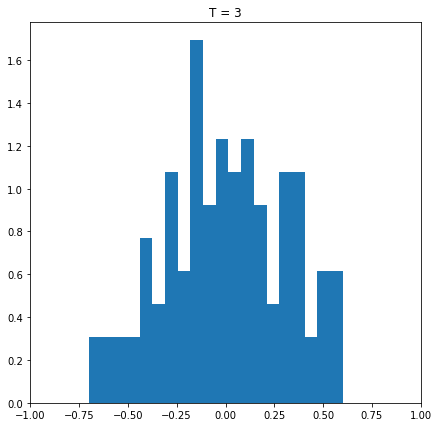

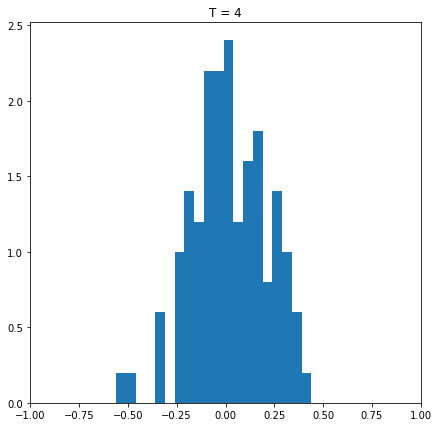

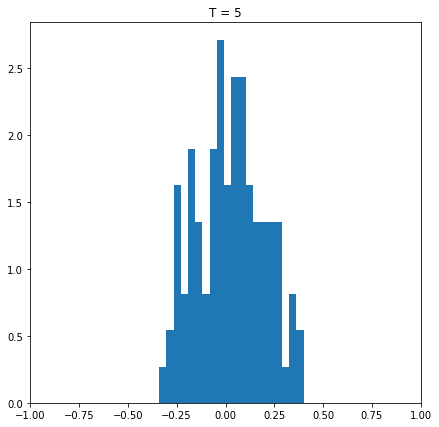

In [90]:
n=10

def magnetization(steps=100000,trials =100):
    M = np.zeros(100)
    for i in range(trials):
        initialize()
        for j in range(steps):
            update()
        M[i] = np.mean(config)
    return M

for T in range(1,6):
    M = magnetization()
    plt.figure(figsize=(7,7))
    plt.hist(M, density = 1, bins = 20)
    plt.xlim([-1,1])
    plt.title('T = {}'.format(T))
    plt.show()

We can see how the greater the T, the more balanced the grid is. Moreover, we can see a normal-like distribution the greater T is.

E_ij is positive whenever the sum of the products is negative, which is when there were more opposing atoms in the neighborhood of one given atom. Also |E_ij| >= 1 or E_ij = 0, because E_ij is an integer in [-4,4]. This means that |e^E_ij| >= 1 when E_ij is positive. Now when T is smaller or equal than 2 and E is positive, then |e^2E_ij/T| > |e^E_ij| >= 1, and so we will always flip whenever there are more opposing atoms in the neighborhood. This means that we for sure will become like our neighbors when T<=2. 

If T>2 then we will have smaller probabilities which means that we become like our neighbors less often.

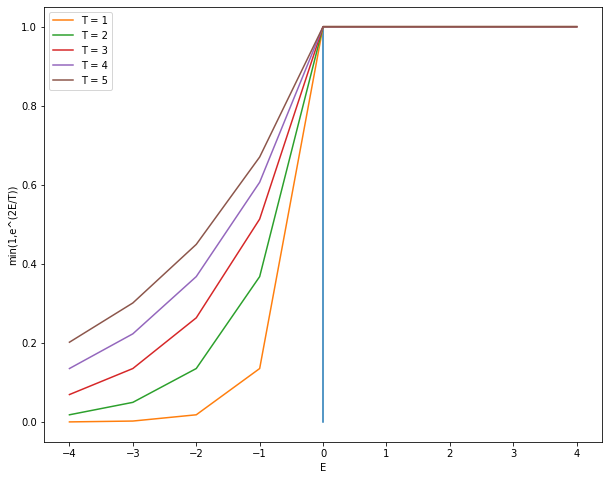

In [121]:
T=1
E = np.arange(-4,5)
X = [min(1,np.e**(2*x/T)) for x in E]

plt.figure(figsize=(10,8))
T=1
X = [min(1,np.e**(2*x/T)) for x in E]
plt.plot([0,0],[0,1])
plt.plot(E,X, label = "T = {}".format(T))
T=2
X = [min(1,np.e**(2*x/T)) for x in E]
plt.plot(E,X, label = "T = {}".format(T))
T=3
X = [min(1,np.e**(2*x/T)) for x in E]
plt.plot(E,X, label = "T = {}".format(T))
T=4
X = [min(1,np.e**(2*x/T)) for x in E]
plt.plot(E,X, label = "T = {}".format(T))
T=5
X = [min(1,np.e**(2*x/T)) for x in E]
plt.plot(E,X, label = "T = {}".format(T))
plt.legend()
plt.xlabel('E')
plt.ylabel('min(1,e^(2E/T))')
plt.show()

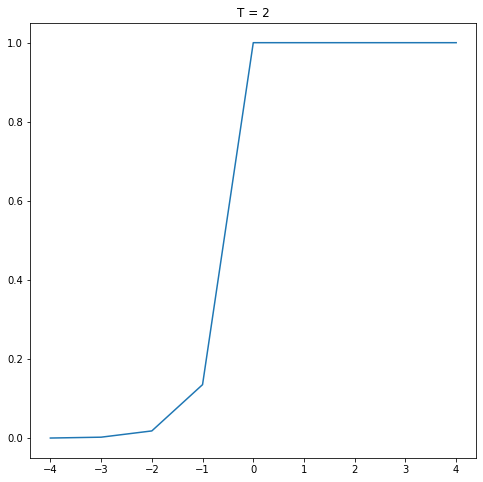

In [104]:
T = 2
plt.figure(figsize=(8,8))
plt.plot(E,X)
plt.title('T = {}'.format(T))
plt.show()

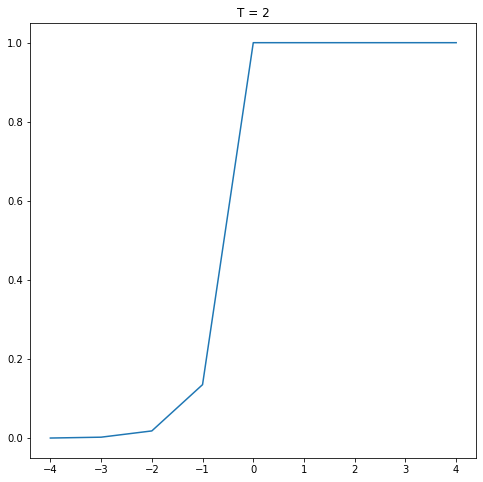

In [106]:
T = 2
plt.figure(figsize=(8,8))
plt.plot(E,X)
plt.title('T = {}'.format(T))
plt.show()